In [ ]:
 path = 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'

In [ ]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [ ]:
import json
path = 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'
records = [json.loads(line) for line in open(path)]

In [ ]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [ ]:
 records[0]['tz']

'America/New_York'

In [ ]:
 #print records[0]['tz']
 #This throws error "KeyError: 'tz'""

In [ ]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [ ]:
 time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [ ]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
             counts[x] += 1
        else:
            counts[x] = 1
    return counts


In [ ]:
from collections import defaultdict
def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [ ]:
counts = get_counts(time_zones)

In [ ]:
print(counts)

{'America/New_York': 1251, 'America/Denver': 191, 'America/Sao_Paulo': 33, 'Europe/Warsaw': 16, '': 521, 'America/Los_Angeles': 382, 'Asia/Hong_Kong': 10, 'Europe/Rome': 27, 'Africa/Ceuta': 2, 'Europe/Madrid': 35, 'Asia/Kuala_Lumpur': 3, 'Asia/Nicosia': 1, 'Europe/London': 74, 'Pacific/Honolulu': 36, 'America/Chicago': 400, 'Europe/Malta': 2, 'Europe/Lisbon': 8, 'Europe/Paris': 14, 'Europe/Copenhagen': 5, 'America/Mazatlan': 1, 'Europe/Dublin': 3, 'Europe/Brussels': 4, 'America/Vancouver': 12, 'Europe/Amsterdam': 22, 'Europe/Prague': 10, 'Europe/Stockholm': 14, 'America/Anchorage': 5, 'Asia/Bangkok': 6, 'Europe/Berlin': 28, 'America/Rainy_River': 25, 'Europe/Budapest': 5, 'Asia/Tokyo': 37, 'Europe/Vienna': 6, 'America/Phoenix': 20, 'Asia/Jerusalem': 3, 'Asia/Karachi': 3, 'America/Bogota': 3, 'America/Indianapolis': 20, 'America/Montreal': 9, 'Asia/Calcutta': 9, 'Europe/Skopje': 1, 'Asia/Beirut': 4, 'Australia/NSW': 6, 'Chile/Continental': 6, 'America/Halifax': 4, 'America/Edmonton': 6,

In [ ]:
 counts['America/New_York']


1251

In [ ]:
len(time_zones)

3440

In [ ]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]


In [ ]:
 top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [ ]:
from collections import Counter

In [ ]:
counts = Counter(time_zones)

In [ ]:
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [ ]:
from pandas import DataFrame, Series

In [ ]:
import pandas as pd

In [ ]:
frame = DataFrame(records)

In [ ]:
frame

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN


In [ ]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [ ]:
tz_counts = frame['tz'].value_counts()

In [ ]:
tz_counts[:10]


America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [ ]:
 clean_tz = frame['tz'].fillna('Missing')

In [ ]:
 clean_tz[clean_tz == ''] = 'Unknown'


In [ ]:
tz_counts = clean_tz.value_counts()

In [ ]:
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

<AxesSubplot:>

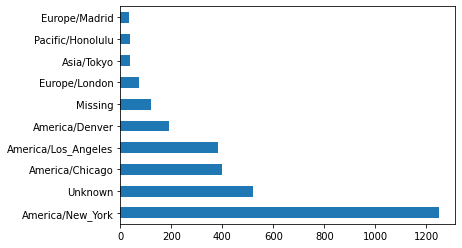

In [ ]:
tz_counts[:10].plot(kind='barh', rot=0)

In [ ]:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [ ]:
frame['a'][50]


'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [ ]:
 frame['a'][51]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'

In [ ]:
results = Series([x.split()[0] for x in frame.a.dropna()])

In [ ]:
results[:5]


0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [ ]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [ ]:
cframe = frame[frame.a.notnull()]

In [ ]:
import numpy as np

operating_system = np.where(cframe['a'].str.contains('Windows'),'Windows', 'Not Windows')

In [ ]:
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'],
      dtype='<U11')

In [ ]:
 by_tz_os = cframe.groupby(['tz', operating_system])

In [ ]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [ ]:
agg_counts[:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [ ]:
indexer = agg_counts.sum(1).argsort()


In [ ]:
 indexer[:10]


tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [ ]:
count_subset = agg_counts.take(indexer)[-10:]


In [ ]:
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


<AxesSubplot:ylabel='tz'>

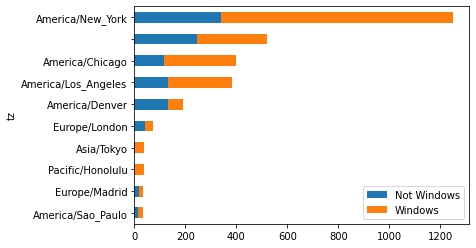

In [ ]:
count_subset.plot(kind='barh', stacked=True)


In [ ]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)

<AxesSubplot:ylabel='tz'>

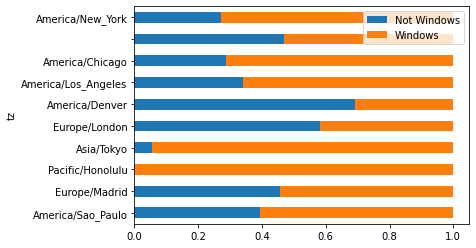

In [ ]:
normed_subset.plot(kind='barh', stacked=True)

In [ ]:
import pandas as pd


In [ ]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep=':', header=None, names=unames)
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep=':', header=None,names=rnames)
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat', sep=':', header=None,names=mnames)

users[:5]

,,,,user_id,gender,age,occupation,zip
1,NaN,F,NaN,1,NaN,10,NaN,48067
2,NaN,M,NaN,56,NaN,16,NaN,70072
3,NaN,M,NaN,25,NaN,15,NaN,55117
4,NaN,M,NaN,45,NaN,7,NaN,02460
5,NaN,M,NaN,25,NaN,20,NaN,55455


In [ ]:
ratings[:5]

user_id  movie_id  rating  timestamp
1 NaN 1193      NaN         5     NaN  978300760
      661       NaN         3     NaN  978302109
      914       NaN         3     NaN  978301968
      3408      NaN         4     NaN  978300275
      2355      NaN         5     NaN  978824291

In [ ]:
movies[:5]

,,movie_id,title,genres
1,NaN,Toy Story (1995),NaN,Animation|Children's|Comedy
2,NaN,Jumanji (1995),NaN,Adventure|Children's|Fantasy
3,NaN,Grumpier Old Men (1995),NaN,Comedy|Romance
4,NaN,Waiting to Exhale (1995),NaN,Comedy|Drama
5,NaN,Father of the Bride Part II (1995),NaN,Comedy


In [ ]:
 ratings

user_id  movie_id  rating  timestamp
1    NaN 1193      NaN         5     NaN  978300760
         661       NaN         3     NaN  978302109
         914       NaN         3     NaN  978301968
         3408      NaN         4     NaN  978300275
         2355      NaN         5     NaN  978824291
...                ...       ...     ...        ...
6040 NaN 1091      NaN         1     NaN  956716541
         1094      NaN         5     NaN  956704887
         562       NaN         5     NaN  956704746
         1096      NaN         4     NaN  956715648
         1097      NaN         4     NaN  956715569

[1000209 rows x 4 columns]

In [ ]:
data = pd.merge(pd.merge(ratings, users), movies)

In [ ]:
data

,user_id,rating,timestamp,gender,age,occupation,zip,movie_id,title,genres


In [ ]:
# data.iloc[0]

In [ ]:
 mean_ratings = data.pivot_table('rating',aggfunc='mean',columns='gender')
#   rows='title',cols='gender', aggfunc='mean')

In [ ]:
 mean_ratings[:5]


gender
rating


In [ ]:
 ratings_by_title = data.groupby('title').size()


In [ ]:
ratings_by_title[:10]

Series([], dtype: int64)

In [ ]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [ ]:
active_titles

Index([], dtype='object', name='title')

In [ ]:
 mean_ratings = mean_ratings.iloc[active_titles]

In [ ]:
mean_ratings


gender


In [ ]:
top_female_ratings = mean_ratings.sort_index(level='F', ascending=False)


In [ ]:
top_female_ratings[:10]

gender


In [ ]:
#  mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F'].

In [ ]:
# sorted_by_diff = mean_ratings.sort_index(by='diff')

In [ ]:
#  sorted_by_diff[:15]

In [ ]:
# sorted_by_diff[::-1][:15]

In [ ]:
# rating_std_by_title = data.groupby('title')['rating'].std()

In [ ]:
# rating_std_by_title = rating_std_by_title.ix[active_titles]

In [ ]:
# rating_std_by_title.order(ascending=False)[:10]

In [ ]:
# names.head(10)

In [ ]:
!head -n 10 names/yob1880.txt

In [ ]:
import pandas as pd
names1880 = pd.read_csv('names/yob1880.txt', names=['name', 'sex', 'births'])
names1880


,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [ ]:
names1880.groupby('sex').births.sum()

sex
F     90994
M    110490
Name: births, dtype: int64

In [ ]:
# 2010 is the last available year right now
years = range(1880, 2011)
pieces = []
columns = ['name', 'sex', 'births']
for year in years:
    path = 'names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)
    # Concatenate everything into a single DataFrame
    names = pd.concat(pieces, ignore_index=True)

In [ ]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1692251,Zymaire,M,5,2010
1692252,Zyonne,M,5,2010
1692253,Zyquarius,M,5,2010
1692254,Zyran,M,5,2010


In [ ]:
total_births = names.pivot_table('births', columns='sex', aggfunc=sum)

<AxesSubplot:title={'center':'Total births by sex and year'}>

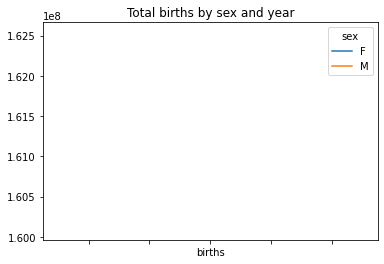

In [ ]:
total_births.plot(title='Total births by sex and year')

In [ ]:
def add_prop(group):
    # Integer division floors
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [ ]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1692251,Zymaire,M,5,2010,0.000003
1692252,Zyonne,M,5,2010,0.000003
1692253,Zyquarius,M,5,2010,0.000003
1692254,Zyran,M,5,2010,0.000003


In [ ]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [ ]:
def get_top1000(group):
    return group.sort_index(level='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [ ]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_index(level='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)


In [ ]:
top1000

,name,sex,births,year,prop
0,Wilma,F,5,1880,0.000055
1,Vertie,F,5,1880,0.000055
2,Verona,F,5,1880,0.000055
3,Vannie,F,5,1880,0.000055
4,Ula,F,5,1880,0.000055
...,...,...,...,...,...
261872,Kalee,M,5,2010,0.000003
261873,Kalae,M,5,2010,0.000003
261874,Kaiyden,M,5,2010,0.000003
261875,Kaiven,M,5,2010,0.000003


In [ ]:
 boys = top1000[top1000.sex == 'M']

In [ ]:
 girls = top1000[top1000.sex == 'F']

In [ ]:
total_births = top1000.pivot_table('births', columns='name',aggfunc=sum)


In [ ]:
# total_births
# output too big

In [ ]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

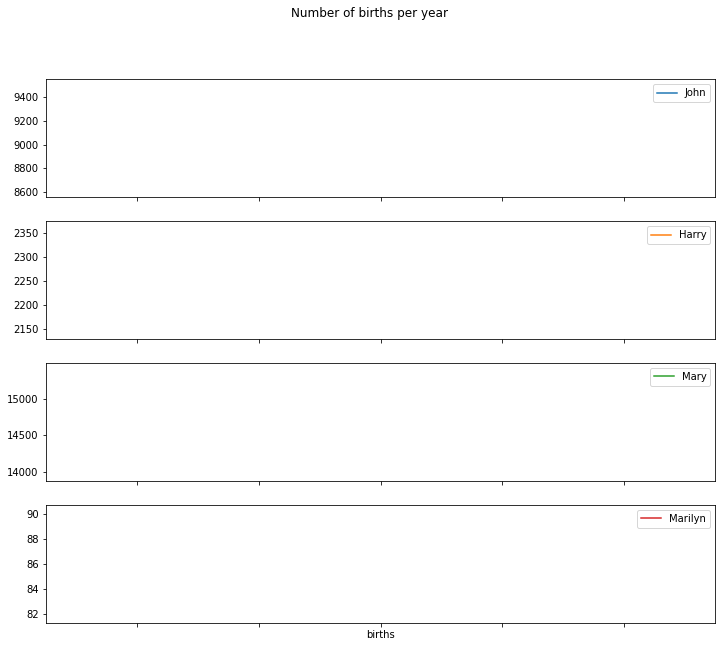

In [ ]:
 subset.plot(subplots=True, figsize=(12, 10), grid=False,title="Number of births per year")

In [ ]:
table = top1000.pivot_table('prop', columns='sex', aggfunc=sum)

<AxesSubplot:title={'center':'Sum of table1000.prop by year and sex'}>

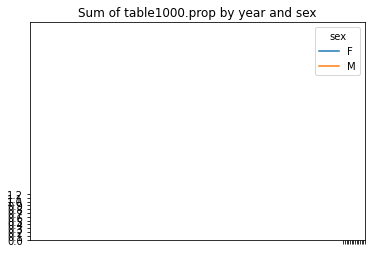

In [ ]:
table.plot(title='Sum of table1000.prop by year and sex',
 yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [ ]:
df = boys[boys.year == 2010]

In [ ]:
df

,name,sex,births,year,prop
260877,Zzyzx,M,5,2010,0.000003
260878,Zyran,M,5,2010,0.000003
260879,Zyquarius,M,5,2010,0.000003
260880,Zyonne,M,5,2010,0.000003
260881,Zymaire,M,5,2010,0.000003
...,...,...,...,...,...
261872,Kalee,M,5,2010,0.000003
261873,Kalae,M,5,2010,0.000003
261874,Kaiyden,M,5,2010,0.000003
261875,Kaiven,M,5,2010,0.000003


In [ ]:
prop_cumsum = df.sort_index(level='prop', ascending=False).prop.cumsum()


In [ ]:
prop_cumsum[:10]


261876    0.000003
261875    0.000005
261874    0.000008
261873    0.000010
261872    0.000013
261871    0.000016
261870    0.000018
261869    0.000021
261868    0.000023
261867    0.000026
Name: prop, dtype: float64

In [ ]:
prop_cumsum.searchsorted(0.5)

1000

In [ ]:
df = boys[boys.year == 1900]

In [ ]:
in1900 = df.sort_index(level='prop', ascending=False).prop.cumsum()

In [ ]:
in1900.searchsorted(0.5) + 1

1001

In [ ]:
def get_quantile_count(group, q=0.5):
 group = group.sort_index(level='prop', ascending=False)
 return group.prop.cumsum().searchsorted(q) + 1

In [ ]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [ ]:
diversity.head()

sex,F,M
year,,
1880,38,1001
1881,38,14
1882,289,1001
1883,1001,1001
1884,1001,1001


In [ ]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
table = names.pivot_table('births', columns=['sex', 'year'], aggfunc=sum)

In [ ]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')

subtable.head()

sex          F                         M                  
year      1910     1960     2010    1910     1960     2010
births  396505  2022015  1775857  194210  2132133  1917024

In [ ]:
subtable.sum

letter_prop = subtable / subtable.sum().astype(float)

<AxesSubplot:title={'center':'Female'}>

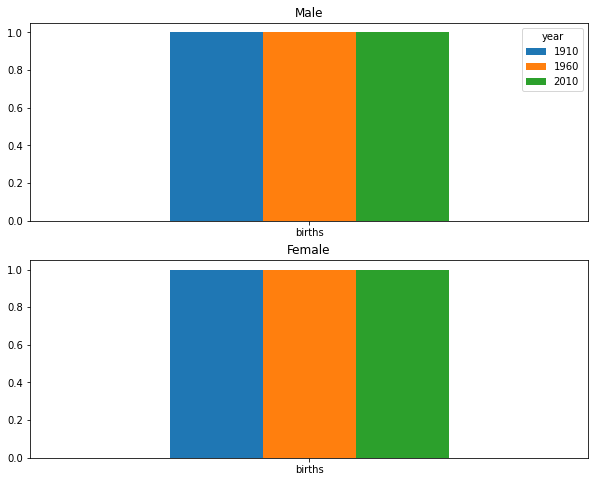

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
 legend=False)


In [ ]:
letter_prop = table / table.sum().astype(float)

In [ ]:
# dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T

In [ ]:
# dny_ts.head()

In [ ]:
# dny_ts.plot()

In [ ]:
all_names = top1000.name.unique()

In [ ]:
 mask = np.array(['lesl' in x.lower() for x in all_names])

In [ ]:
lesley_like = all_names[mask]

In [ ]:
lesley_like

array(['Leslie', 'Lesley', 'Boleslaw', 'Boleslaus', 'Lesly', 'Leslye',
       'Wellesley', 'Leslee', 'Leslyn', 'Lesle', 'Leslieann', 'Lesleyann',
       'Lesleyanne', 'Leslianne', 'Leslea', 'Leslieanne', 'Leslian'],
      dtype=object)

In [ ]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Boleslaus      20
Boleslaw        5
Lesle          15
Leslea          5
Leslee         71
Lesley        161
Lesleyann      40
Lesleyanne     20
Leslian         5
Leslianne      10
Leslie        983
Leslieann      20
Leslieanne      5
Lesly         107
Leslye         26
Leslyn         40
Wellesley       6
Name: births, dtype: int64

In [ ]:
table = filtered.pivot_table('births', columns='sex', aggfunc='sum')

In [ ]:
table = table.div(table.sum(1), axis=0)


In [ ]:
table.tail()

sex,F,M
births,0.261209,0.738791
